In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ironhack /Week 5 - EDA/Day 2 - Análisis Bivariante/Lab/amz_uk_price_prediction_dataset.csv')

In [5]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [11]:
crosstab = pd.crosstab(df['category'],df['isBestSeller'])

proportion = crosstab.div(crosstab.sum(axis=1), axis=0)

proportion_sorted = proportion.sort_values(by=True, ascending=False)

proportion_sorted[True]

proportion_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
Bedding Collections,1.000000,0.000000
CPUs,1.000000,0.000000
"CD, Disc & Tape Players",1.000000,0.000000


In [17]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


p_value = chi2_contingency(crosstab)[1]

association(crosstab, method ='cramer')


0.1222829439760564

<Axes: xlabel='category'>

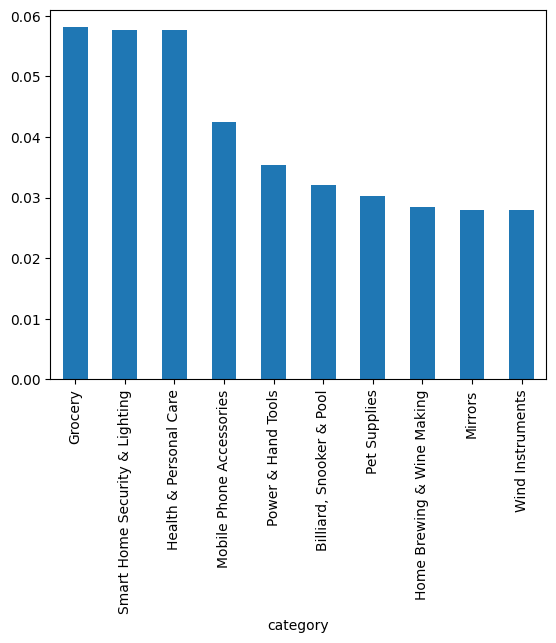

In [21]:
(df.groupby('category')['isBestSeller']
   .mean()
   .sort_values(ascending=False)
   .head(10)  # te quedas con el top 10
   .plot(kind='bar'))




In [30]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Devuelve SOLO los valores dentro del rango
    return data[(data >= lower_bound) & (data <= upper_bound)]




df['price'] = remove_outliers(df['price'])
df = df.dropna(subset=['price'])  # eliminar filas que se quedaron con NaN


df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<Axes: xlabel='category', ylabel='price'>

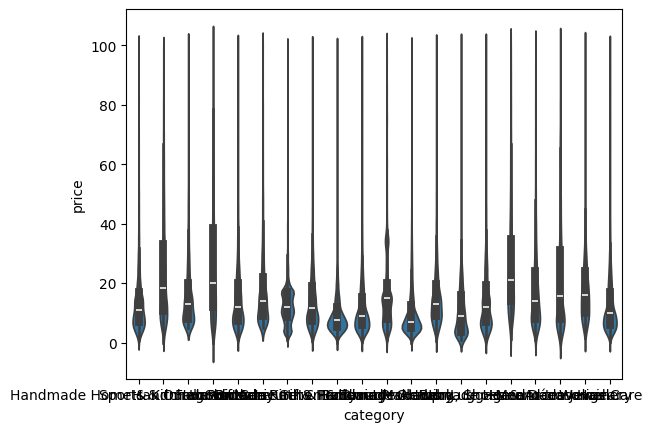

In [31]:
top20 = df['category'].value_counts().head(20).index
df_top20 = df[df['category'].isin(top20)]

sns.violinplot(data=df_top20, x="category", y="price")


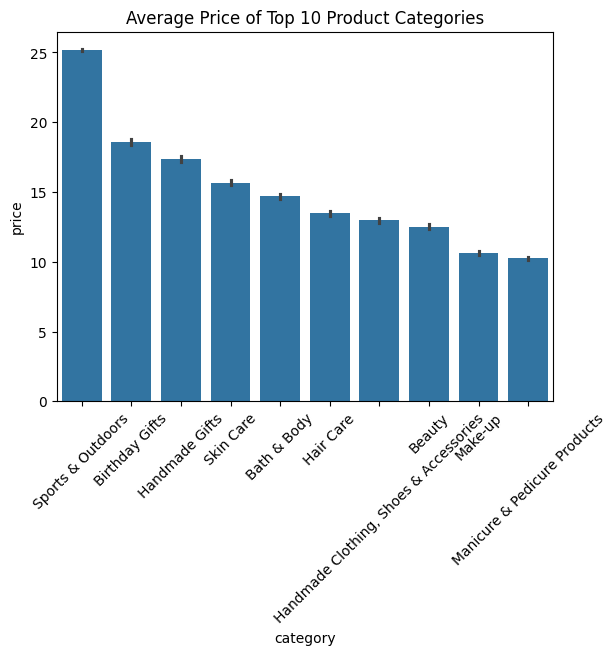

In [33]:
top10 = df['category'].value_counts().head(10).index

# 2. Filtramos el DataFrame para quedarnos solo con esas categorías
df_top10 = df[df['category'].isin(top10)]

sns.barplot(
    data=df_top10,
    x="category",
    y="price",
    estimator="mean",
    order=df_top10.groupby("category")["price"].mean().sort_values(ascending=False).index
)
plt.xticks(rotation=45)
plt.title("Average Price of Top 10 Product Categories")
plt.show()

In [35]:
top10 = df['category'].value_counts().head(10).index

# 2. Filtrar
df_top10 = df[df['category'].isin(top10)]

# 3. Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_top10,
    x="category",
    y="rating",
    order=df_top10['category'].value_counts().index  # ordenadas por frecuencia
)
plt.xticks(rotation=45)
plt.title("Distribution of Ratings by Category (Top 10 Categories)")
plt.show()

ValueError: Could not interpret value `rating` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

Pearson r = -0.078 (p = 0)
Spearman ρ = -0.067 (p = 0)


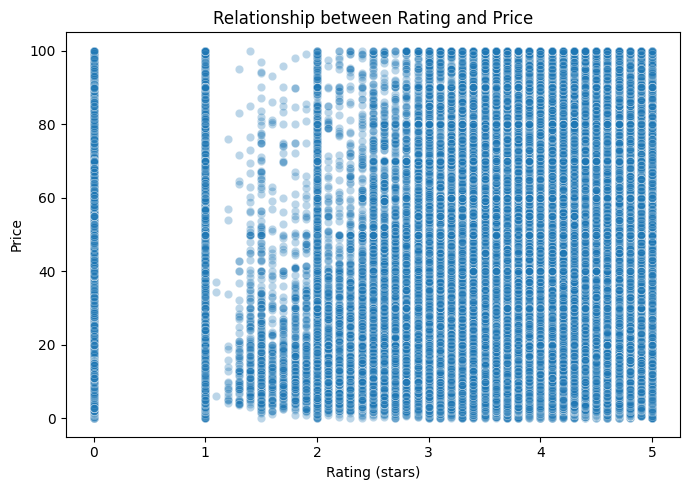

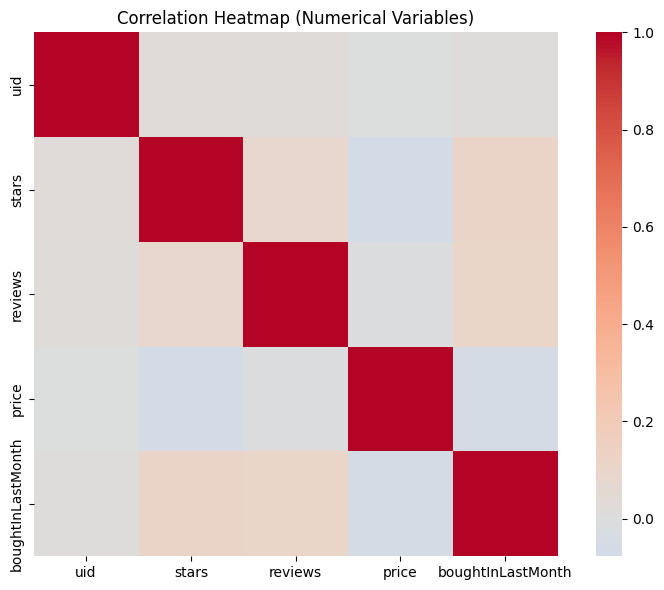

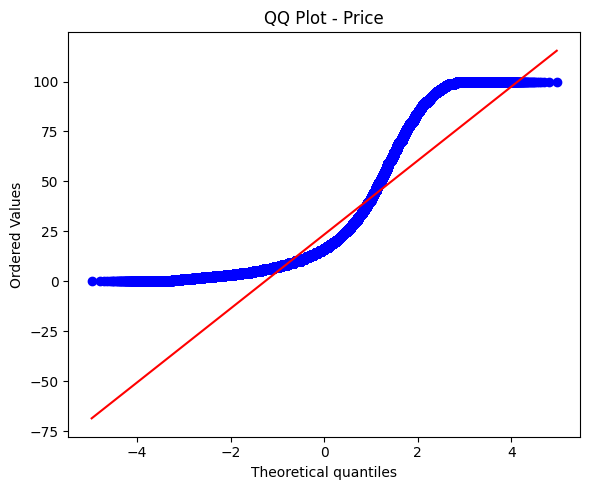

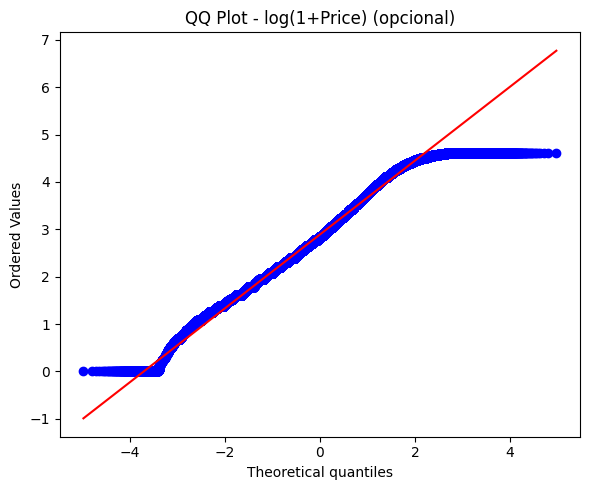

In [37]:
correlation = df['price'].corr(df['stars'])

correlation



sub = df[['price', 'stars']].dropna()
r_pearson, p_pearson   = pearsonr(sub['price'], sub['stars'])
r_spearman, p_spearman = spearmanr(sub['price'], sub['stars'])

print(f"Pearson r = {r_pearson:.3f} (p = {p_pearson:.3g})")
print(f"Spearman ρ = {r_spearman:.3f} (p = {p_spearman:.3g})")


plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x='stars', y='price', alpha=0.3)
plt.xlabel('Rating (stars)')
plt.ylabel('Price')
plt.title('Relationship between Rating and Price')
plt.tight_layout()
plt.show()
num = df.select_dtypes(include='number').dropna(axis=0, how='any')
corr_mat = num.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, cmap='coolwarm', center=0, annot=False, square=True)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,5))
probplot(df['price'].dropna(), dist='norm', plot=plt)
plt.title('QQ Plot - Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
probplot(np.log1p(df['price'].dropna()), dist='norm', plot=plt)
plt.title('QQ Plot - log(1+Price) (opcional)')
plt.tight_layout()
plt.show()
